# Happy Customers

In [1]:
#importing libraries 
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.metrics import accuracy_score,roc_auc_score

import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
# loading the data 
data = pd.read_csv('ACME-HappinessSurvey2020.csv')
print(data.shape)
data.head()

(126, 7)


,Y,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5


The data has 126 rows and 7 total features, out of which 1 is dependent (Y), and rest are independent

In [3]:
# missing values 
data.isnull().sum()

Y     0
X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
dtype: int64

There are no missing values, so that's great. 

# Exploratory data analysis

We will the data and get a sense of how things are. 

- ## Y (dependent variable)

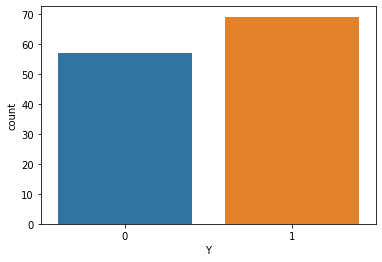

In [4]:
sns.countplot(x='Y',data=data)

The data doens't have highly imbalanced classes. (so we have one less thing to worry about).

- ## X1 = (my order was delievered on time)

In [5]:
# distribution of X1
data['X1'].value_counts() / len(data)

5    0.515873
4    0.317460
3    0.158730
1    0.007937
Name: X1, dtype: float64

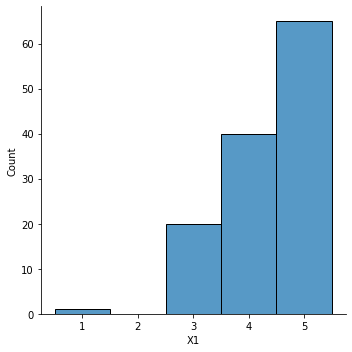

In [6]:
# lets look at the distribution of this feature
sns.displot(x='X1',data=data,discrete=True)

Looking at the distribution of this feature, we can infer that more than half of the customer have rated 3.
Except one customer, all have given more than 5 points. (kudos to the delivering team)

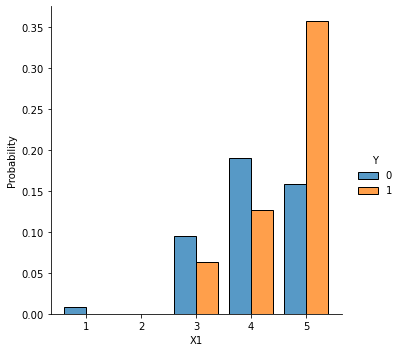

In [7]:
# now lets see how its related to the response
sns.displot(x='X1',data=data,hue='Y',discrete=True,multiple="dodge",shrink = 0.8,stat='probability')

From the above graph, we can infer that for any customer with a rating of 5, there's twice as more chance that they are happy (0.35 vs 0.15). Also, there's a single user who has given less than 3 rating, and they are not so happy. :(

- ## X2 = contents of my order was as I expected

In [8]:
# distribution of X2
data['X2'].value_counts() / len(data)

3    0.333333
2    0.269841
1    0.214286
4    0.134921
5    0.047619
Name: X2, dtype: float64

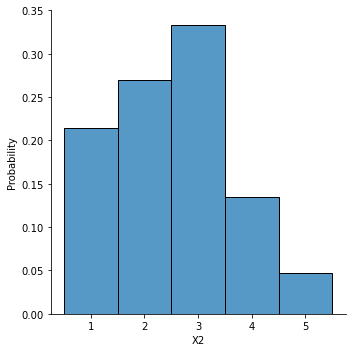

In [9]:
# lets look at the distribution of this feature
sns.displot(x='X2',data=data,discrete=True,stat='probability')

Approximately 80% of the customers have given <=3 ratings, therefore, the content of the orders were really not they were expecting. 

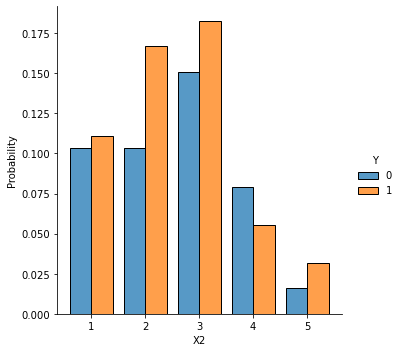

In [10]:
# now lets see how its related to the response
sns.displot(x='X2',data=data,hue='Y',discrete=True,multiple="dodge",shrink = 0.8,stat='probability')

From the above graph, its really not that conclusive as to this feature is giving any information about whether the customer is happy or not.

- ## X2 = contents of my order was as I expected

In [11]:
# distribution of X2
data['X2'].value_counts() / len(data)

3    0.333333
2    0.269841
1    0.214286
4    0.134921
5    0.047619
Name: X2, dtype: float64

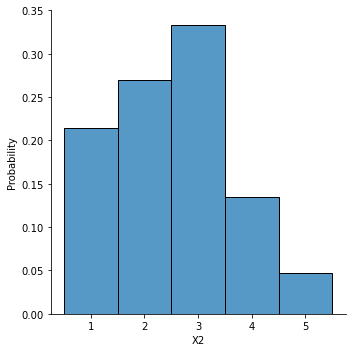

In [12]:
# lets look at the distribution of this feature
sns.displot(x='X2',data=data,discrete=True,stat='probability')

Approximately 80% of the customers have given <=3 ratings, therefore, the content of the orders were really not they were expecting. This needs some improvements from the company's side

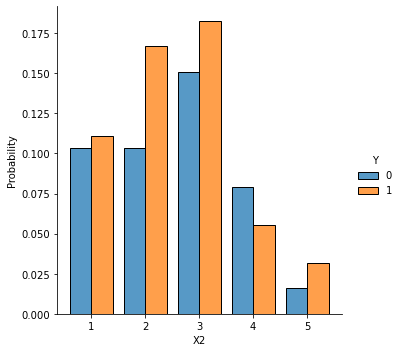

In [13]:
# now lets see how its related to the response
sns.displot(x='X2',data=data,hue='Y',discrete=True,multiple="dodge",shrink = 0.8,stat='probability')

This feature isn't that conclusive to determine whether a customer is happy or not. 

- ## X3 = I ordered everything I wanted to order

In [14]:
# distribution of X3
data['X3'].value_counts() / len(data)

3    0.436508
4    0.261905
5    0.134921
2    0.111111
1    0.055556
Name: X3, dtype: float64

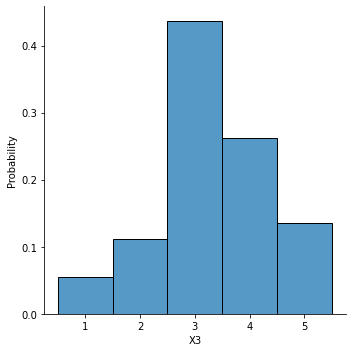

In [15]:
# lets look at the distribution of this feature
sns.displot(x='X3',data=data,discrete=True,stat='probability')

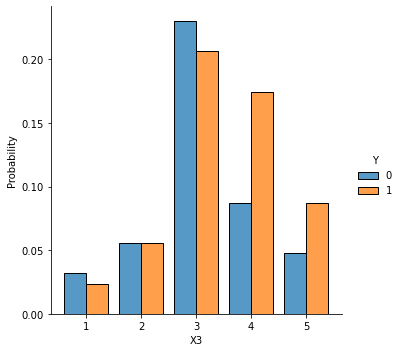

In [16]:
# now lets see how its related to the response
sns.displot(x='X3',data=data,hue='Y',discrete=True,multiple="dodge",shrink = 0.8,stat='probability')

From the above graph, it can be said that customers having more than 3 rating on X3 are much more likely to be happy

- ## X4 = I paid a good price for my order 

In [17]:
# distribution of X4
data['X4'].value_counts() / len(data)

4    0.420635
3    0.325397
5    0.198413
2    0.039683
1    0.015873
Name: X4, dtype: float64

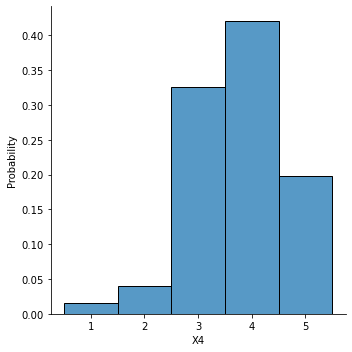

In [18]:
# lets look at the distribution of this feature
sns.displot(x='X4',data=data,discrete=True,stat='probability')

The company provides good value for money :)

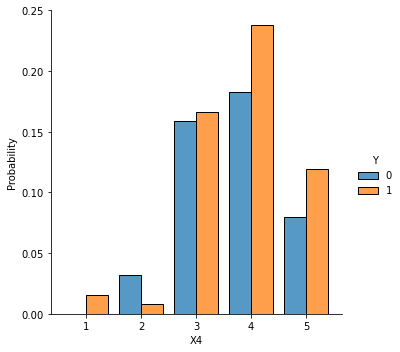

In [19]:
# now lets see how its related to the response
sns.displot(x='X4',data=data,hue='Y',discrete=True,multiple="dodge",shrink = 0.8,stat='probability')

Its surprising that 2 customers who have given 1 rating belong to happy categpry. Although as expected, customers with 4 or 5 ratings are much more likely to be happy.

### Lets see the details of the customer who gave 1 rating

In [20]:
data[data['X4'] == 1]

,Y,X1,X2,X3,X4,X5,X6
34,1,4,1,3,1,1,4
119,1,5,5,1,1,5,1


We can see that even if both the customers rated 1 to feature X4, still they were happy. Both of them had a high rating for X1 ( their products were delievered on time) <br>
Therefore, X1 is more deterministic feature than X4

- ## X5 = I am satisfied with my courier

In [21]:
# distribution of X5
data['X5'].value_counts() / len(data)

4    0.396825
5    0.246032
3    0.174603
2    0.126984
1    0.055556
Name: X5, dtype: float64

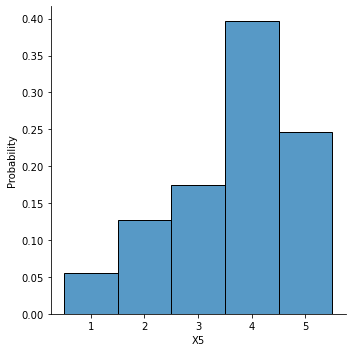

In [22]:
# lets look at the distribution of this feature
sns.displot(x='X5',data=data,discrete=True,stat='probability')

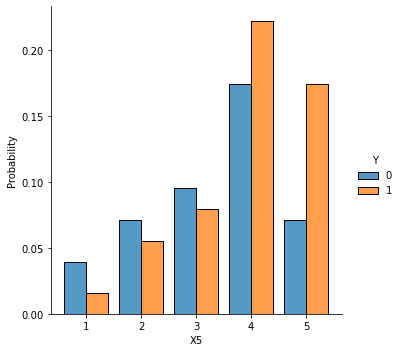

In [23]:
# now lets see how its related to the response
sns.displot(x='X5',data=data,hue='Y',discrete=True,multiple="dodge",shrink = 0.8,stat='probability')

Customers with less satisfaction rate are more likely to be unhappy, whereas customer with more ratings are more likely to be happy. This looks fair. 

- ## X6 = the app makes ordering easy for me 

In [24]:
# distribution of X6
data['X6'].value_counts() / len(data)

5    0.452381
4    0.373016
3    0.158730
2    0.007937
1    0.007937
Name: X6, dtype: float64

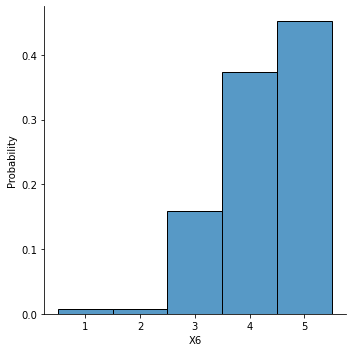

In [25]:
# lets look at the distribution of this feature
sns.displot(x='X6',data=data,discrete=True,stat='probability')

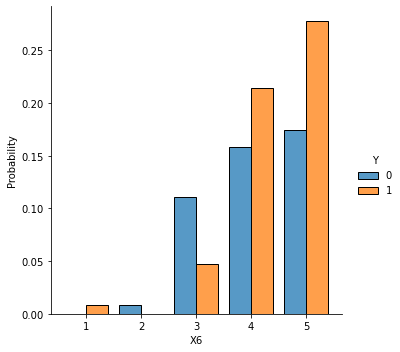

In [26]:
# now lets see how its related to the response
sns.displot(x='X6',data=data,hue='Y',discrete=True,multiple="dodge",shrink = 0.8,stat='probability')

We are getting the strange pattern here as well. Only one customer has given 1 rating, but it belongs to happy category. lets look at the details of the customer. 

In [35]:
data[data['X6'] == 1]

,Y,X1,X2,X3,X4,X5,X6
119,1,5,5,1,1,5,1


Again we see that even if it belongs to happy category has lowest rating for X6, X3 and X4. This customer has given highest ratings to X1, X2 and X5. 

# Making predictve models

Now, since we are done with exploring the data, lets now build some models.

In [27]:
X = data.drop('Y',axis=1)
y = data['Y']

In [28]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.5,random_state=1)

In [29]:

def show_performance(model,X_train,y_train,X_test,y_test,roc=False):
    model.fit(X_train,y_train)
    print('Training accuracy - ',accuracy_score(model.predict(X_train),y_train))
    print('Validation accuracy - ',accuracy_score(model.predict(X_test),y_test))
    
    if roc:
        print('')
        print('Training ROC - ',roc_auc_score(y_train,model.predict_proba(X_train)[:,1]))
        print('Test ROC - ',roc_auc_score(y_test,model.predict_proba(X_test)[:,1]))
        

def run_classification_models(X_train,y_train,X_test,y_test,roc=True):
    models = [LogisticRegression(), RandomForestClassifier(),XGBClassifier()]
    model_names = ['Logistic Regression','Random Forest','XGBclassifier']
    
    for i in range(len(models)):
        print('-------------------------------------------')
        print('For ',model_names[i],' -')
        print('')
        show_performance(models[i],X_train,y_train,X_test,y_test,roc)
        print('-------------------------------------------')


In [31]:
run_classification_models(X,y,X_test,y_test)

-------------------------------------------
For  Logistic Regression  -

Training accuracy -  0.5793650793650794
Validation accuracy -  0.5555555555555556

Training ROC -  0.680650902618866
Test ROC -  0.6347006651884701
-------------------------------------------
-------------------------------------------
For  Random Forest  -

Training accuracy -  0.9444444444444444
Validation accuracy -  0.9365079365079365

Training ROC -  0.9916094584286804
Test ROC -  0.9883592017738358
-------------------------------------------
-------------------------------------------
For  XGBclassifier  -

Training accuracy -  0.9365079365079365
Validation accuracy -  0.9206349206349206

Training ROC -  0.9877955758962624
Test ROC -  0.9739467849223946
-------------------------------------------


XGB Classifier are giving the best results.

In [32]:
model = XGBClassifier()
model.fit(X,y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

# Bonuses

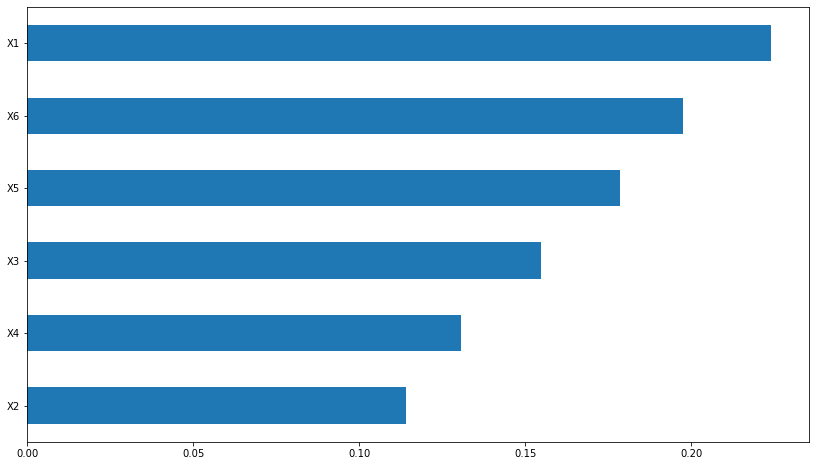

In [33]:
pd.Series(model.feature_importances_,index = X_train.columns).sort_values().plot.barh(figsize=(14,8))

As we were expecting, and also infered while data exploration, X1 is the most important feature to determine whether a customer is happy or not, followed by X6 and X5.

# So, some considerations that ACME can make to improve user expereince are - 
- ### Make sure that the order is delievered on time. 
- ### The app should be easy to use and user friendly. 
- ### Focus on the satisfaction level of the customers.

The questions X1,X6 and X5,Q3 are most important while determining the category of customers, we may as well remove the rest of the questions, as they are relatively less important for the goal we are looking for. 